# importing the dataset

we downloaded the dataset from kaggle

https://www.kaggle.com/uciml/sms-spam-collection-dataset?select=spam.csv

we will use this dataset to classify whether an sms is a spam or ham

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
plt.style.use("seaborn-pastel")
sns.set_theme(palette="dark",style="dark" )

In [45]:
#change the encoding to utf-8 using ms excel first
df = pd.read_csv("/Users/pushpakruhil/DATA SCIENCE/DATASETS/spam.csv", index_col=0, usecols=[0,1], )

In [46]:
df

,v2
v1,
ham,"Go until jurong point, crazy.. Available only ..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup fina...
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives aro..."
...,...
spam,This is the 2nd time we have tried 2 contact u...
ham,Will Ã_ b going to esplanade fr home?
ham,"Pity, * was in mood for that. So...any other s..."


In [47]:
df.index.name = "class"

In [49]:
df.columns = ["Text"]

In [51]:
df.columns

Index(['Text'], dtype='object')

In [58]:
df.index.value_counts()

#we need to stratifically divide our train test data.

ham     4825
spam     747
Name: class, dtype: int64

In [63]:
4825/(4825+747)
#86.5% ham
#13.5% spam

0.8659368269921034

<AxesSubplot:xlabel='class', ylabel='class'>

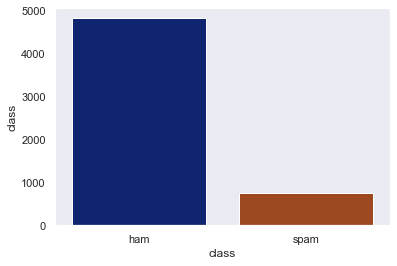

In [84]:
sns.barplot(x=df.index.unique(), y=df.index.value_counts())

# seperating the feature and target column

In [115]:
# this is the first step we need to perform before splitting the dataset

x, y = df.iloc[:,0], df.index

In [116]:
x = pd.DataFrame(x)

In [117]:
y = pd.DataFrame(y)

In [121]:
y.head(2)

,class
0,ham
1,ham


In [122]:
x.index = y.index

In [124]:
x.head(2)

,Text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...


# train test splitting

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y )

In [127]:
y_train.value_counts()

class
ham      3859
spam      598
dtype: int64

In [110]:
3859/4457

0.8658290329818263

In [128]:
y_test.value_counts()

class
ham      966
spam     149
dtype: int64

In [112]:
966/(966+149)

0.8663677130044843

we stratified our splitting using the y df(target column) that we had. we cross checked the ratio, and it's exactly what we needed

In [240]:
x_train

,Text
184,Going on nothing great.bye
2171,I wont. So wat's wit the guys
5422,Ok k..sry i knw 2 siva..tats y i askd..
4113,Where are you ? What do you do ? How can you s...
4588,Have you not finished work yet or something?
...,...
1932,Jus finished avatar nigro
5316,Jus finish watching tv... U?
2308,Moby Pub Quiz.Win a Â£100 High Street prize if...
1903,Free entry in 2 a weekly comp for a chance to ...


# vectorisation 

In [268]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

x_train_series = x_train.squeeze()
lst = x_train_series.tolist()
cv = CountVectorizer(input = lst,
        lowercase=True,
        stop_words='english' #for removing stop words
                     )

In [273]:
x_train_prepared = cv.fit_transform(lst)

In [277]:
x_train_prepared.shape

(4457, 7435)

In [275]:
lst_test = (x_test.squeeze()).tolist()
x_test_prepared = cv.transform(lst_test)

In [276]:
x_test_prepared

<1115x7435 sparse matrix of type '<class 'numpy.int64'>'
	with 7767 stored elements in Compressed Sparse Row format>

In [354]:
y_train = (np.array(y_train)).ravel()

# training the model

In [278]:
from sklearn.svm import SVC
svm_clf = SVC()

svm_clf.fit(x_train_prepared, y_train)

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

# performance measure

In [282]:
some_data = x_train_prepared[47:53]
some_labels = y_train[47:53]

In [285]:
print("predictions:", svm_clf.predict(some_data))
print("labels:", some_labels)

predictions: ['ham' 'ham' 'spam' 'spam' 'ham' 'ham']
labels:      class
2194   ham
3504   ham
1572  spam
2401  spam
1052   ham
3018   ham


In [288]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(svm_clf, x_train_prepared, np.array(y_train).ravel(), cv=3)

In [299]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
cm = confusion_matrix(y_train, y_train_predict)
print(cm)

[[3858    1]
 [ 128  470]]


In [295]:
f1_score(y_train, y_train_predict, average='weighted')

0.9695717745831505

In [298]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3859
        spam       1.00      0.79      0.88       598

    accuracy                           0.97      4457
   macro avg       0.98      0.89      0.93      4457
weighted avg       0.97      0.97      0.97      4457



In [356]:
accuracy_score(y_train, y_train_predict)

0.9710567646398923

<AxesSubplot:>

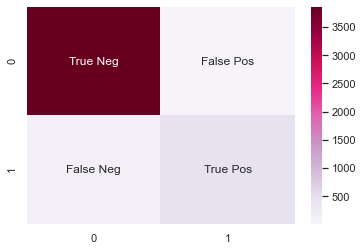

In [368]:

#heatmap for confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(group_names).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='PuRd')

# accuracy on test dataset

In [357]:
y_test_predict = svm_clf.predict(x_test_prepared)

In [358]:
accuracy_score(y_test, y_test_predict)

0.9757847533632287

In [361]:
print("predictions:", y_test_predict[:5])
print("actual labels:", y_test[:5])

predictions: ['ham' 'ham' 'ham' 'spam' 'ham']
actual labels:      class
2826   ham
3695   ham
3906   ham
575   spam
2899   ham


In [365]:
y_test_predict = cross_val_predict(svm_clf, x_test_prepared, np.array(y_test).ravel())
cm_test = confusion_matrix(y_test, y_test_predict)
print(cm_test)

[[966   0]
 [ 81  68]]


In [366]:
f1_score(y_test, y_test_predict, average='weighted')

0.9152575297823144

In [367]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       966
        spam       1.00      0.46      0.63       149

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.79      1115
weighted avg       0.93      0.93      0.92      1115



<AxesSubplot:>

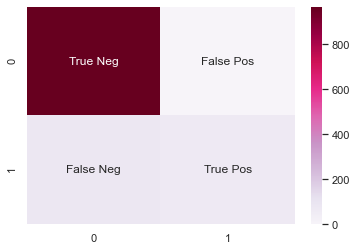

In [369]:

#heatmap for confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(group_names).reshape(2,2)
sns.heatmap(cm_test, annot=labels, fmt='', cmap='PuRd')